In [1]:
# import necessities
import pandas as pd
import numpy as np
from sklearn import preprocessing
df = pd.read_csv("https://raw.githubusercontent.com/ravikanthranjith/BITS-ML-ASSIGNMENT-2/main/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
# From the above we came to know that the dataset is having 3 categorical features and this needs to be processed appropriately 
#as our model will not understand the NoN numerical data
print("Cut: ",set(df["cut"]))
print("Color: ",set(df["color"]))
print("Clarity: ",set(df["clarity"]))

Cut:  {'Good', 'Ideal', 'Very Good', 'Premium', 'Fair'}
Color:  {'D', 'J', 'I', 'G', 'F', 'H', 'E'}
Clarity:  {'I1', 'IF', 'SI1', 'VS1', 'VVS1', 'VS2', 'SI2', 'VVS2'}


In [4]:
#Pre Processing
## In the question it asked for the below
## Identify the columns with missing values (1 point). Fill the missing values with mean value for numerical attributes and mode value for categorical attributes. 
## Checking for the NaN values
df.isnull().any=="True"


False

In [5]:
# It shows that thare are no missing values hence the Point 1 is not required.

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
## Found min values for x, y, z are coming up as zeros which do not make any sense
##Getting the rows for which the diamond shape is not given properly
df[(df.x==0) | (df.y==0) |(df.z==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [8]:
# From the above it is found that ther are around  20 rows which are showing invalid diamond sizes. dropping them all

In [9]:
df.drop(df[(df.x==0) | (df.y==0) |(df.z==0)].index, inplace =  True)

In [10]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
#Now it shows that Min value and Max malues for the length , width, depth are defined properly

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

<Figure size 2000x1500 with 9 Axes>

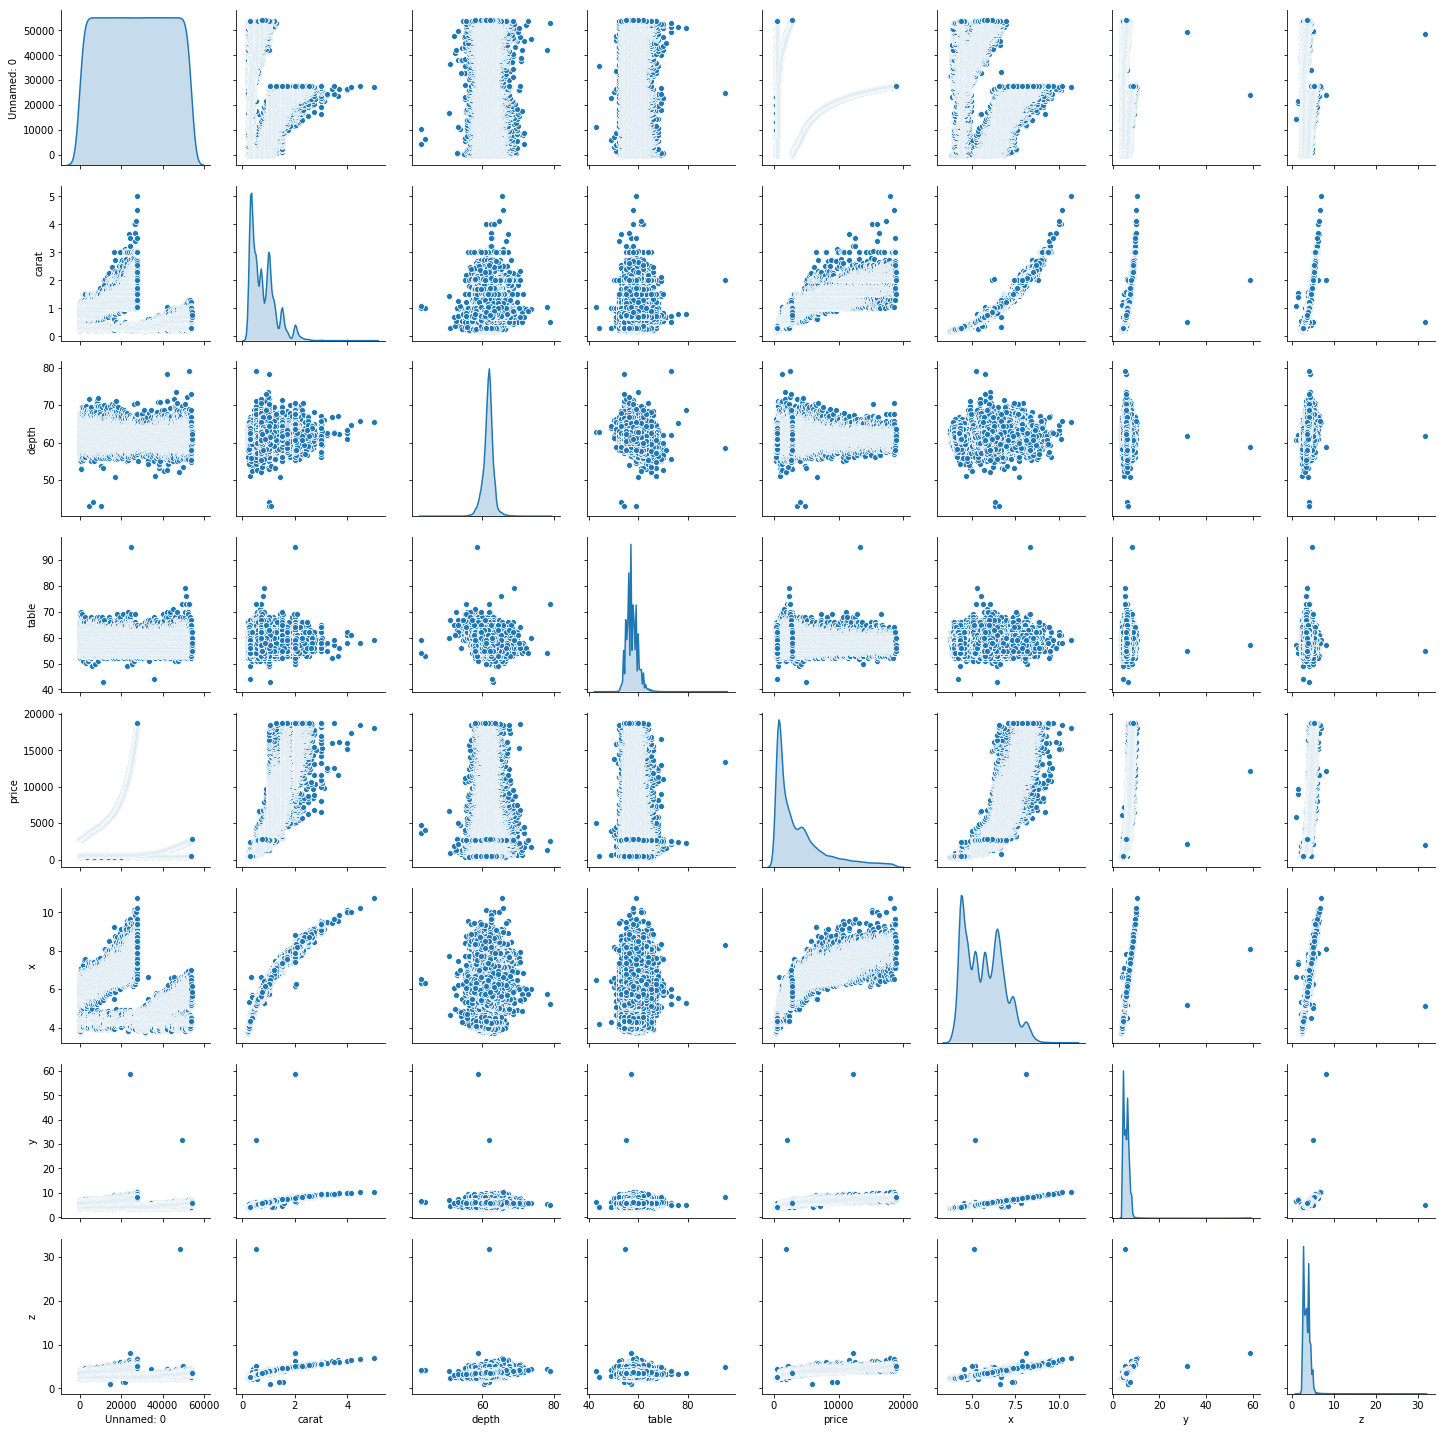

In [13]:
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde');

In [14]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df['price/wt']=df['price']/df['carat']
print(df.groupby('cut')['price/wt'].mean().sort_values())
print(df.groupby('color')['price/wt'].mean().sort_values())
print(df.groupby('clarity')['price/wt'].mean().sort_values())
##df = df.drop(['price/wt','table'], axis=1)

cut
Fair         3766.118259
Good         3859.941207
Ideal        3919.425359
Very Good    4014.035255
Premium      4221.475956
Name: price/wt, dtype: float64
color
E    3804.611475
J    3825.649192
D    3951.218089
I    3995.876925
H    4006.231722
F    4134.951905
G    4163.072359
Name: price/wt, dtype: float64
clarity
I1      2796.257910
SI1     3848.542714
VVS1    3848.887225
SI2     4010.271135
VS2     4079.639432
VS1     4155.640363
VVS2    4204.166013
IF      4259.931736
Name: price/wt, dtype: float64


In [16]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [17]:
df['cut']=df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [18]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price/wt
0,1,0.23,1,1,8,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,2,0.21,5,1,7,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,3,0.23,2,1,4,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,4,0.29,5,6,6,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,5,0.31,2,7,8,63.3,58.0,335,4.34,4.35,2.75,1080.645161


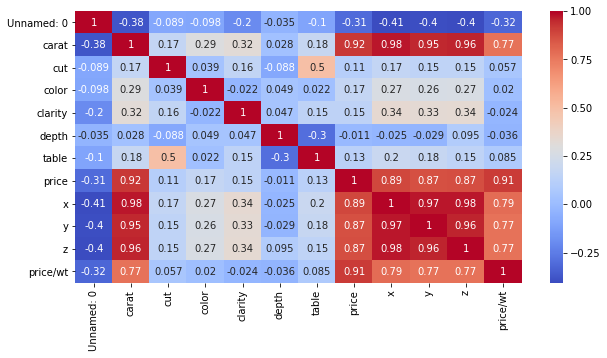

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' );

In [20]:
#From the above we see that the cut, color, clarity , depth are having no co-relation
df['cut/wt']=df['cut']/df['carat']
df['color/wt']=df['color']/df['carat']
df['clarity/wt']=df['clarity']/df['carat']
df = df.drop(['cut','color','clarity','table','depth','Unnamed: 0'], axis=1) #Columns that are not needed like Unnamed, depth are dropped

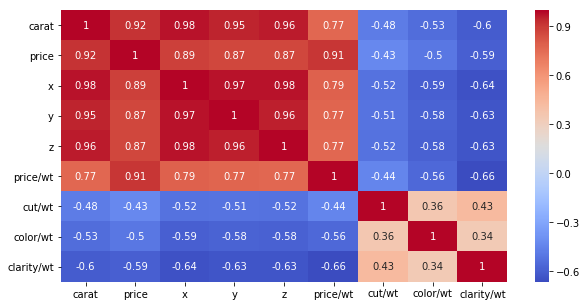

In [21]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' );

In [22]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [49]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

NameError: name 'RepeatedKFold' is not defined

In [24]:
##model = LogisticRegression(solver="liblinear", multi_class="auto")

In [25]:
df.head()

,carat,price,x,y,z,price/wt,cut/wt,color/wt,clarity/wt
0,0.23,326,3.95,3.98,2.43,1417.391304,4.347826,4.347826,34.782609
1,0.21,326,3.89,3.84,2.31,1552.380952,23.809524,4.761905,33.333333
2,0.23,327,4.05,4.07,2.31,1421.739130,8.695652,4.347826,17.391304
3,0.29,334,4.20,4.23,2.63,1151.724138,17.241379,20.689655,20.689655
4,0.31,335,4.34,4.35,2.75,1080.645161,6.451613,22.580645,25.806452


In [43]:
features=['carat','x','y','z','price/wt','cut/wt','color/wt','clarity/wt']

In [44]:
X=df[features]

In [45]:
y=df["price"]

In [67]:
### This is not a classification problems and it is a Problem of predicting contiuous variable

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)


from sklearn import linear_model
reg_all=linear_model.LinearRegression()
reg_all.fit(X_train,Y_train)
y_pred=reg_all.predict(X_test)

Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Variable']
coeff_df["Coeff"] = pd.Series(reg_all.coef_)
coeff_df.sort_values(by='Coeff', ascending=True)
print(coeff_df)
print("Intercept: %f" %(reg_all.intercept_))

mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))

rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))




##X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
##model.fit(X_train, y_train) #Training the model
##pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, model.predict(X_train))],
##    "Accurancy on Test":[accuracy_score(y_test, model.predict(X_test))]})

Rsquare: 0.971536
     Variable         Coeff
0       carat  10323.592576
1           x  -1483.952192
2           y    127.328885
3           z  -1981.653099
4    price/wt      1.230343
5      cut/wt     -3.438532
6    color/wt     45.831869
7  clarity/wt     60.372561
Intercept: 4766.430544
mae: 345.056078
rmse: 666.256835


In [73]:
   # Performing a 10 Fold Cross validation and the Accuracy scores given below.
    
    from sklearn.linear_model import LinearRegression
    
    X_train = df.iloc[train_index].loc[:, features]
    X_test = df.iloc[test_index][features]
    y_train = df.iloc[train_index].loc[:,'price']
    y_test = df.loc[test_index]['price']
lm = LinearRegression()
scores_r2 = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores_r2   



C:\Users\r.narayanabhatla\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


array([  0.87238237,   0.88291508,   0.87756043,   0.96203853,
         0.9513769 , -15.23466529,  -7.0591296 ,  -1.68236334,
        -4.12223475,   0.69241122])